In [3]:
import os

"""
00 - Configuration
"""

dataset_zip_path = "../../data/raw_datasets/short-test-3/prom_and_yolo_data.zip"
output_folder = "../../data/processed/short-test-3/"


In [4]:
"""
01 - Process yolo dataset

- Combine all .csv-files in the given .zip to a DataFrame
- Save the dataframe to output_path
"""


import zipfile
import time
import pandas as pd

names_container = {}
values_container = {}
timestamps_container = {}

# Open as zip
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:

    # Get a list of all files in the zip
    items = zip_ref.namelist()

    # Get a list of all .csv-files in the zip
    csv_files = [x for x in items if x.endswith('.csv')]
    csv_files.sort(reverse=True)  # NOTE: Sorting does not matter, but may be useful for debugging
    
    count = 0
    start_time = time.time()

    # Iterate over all csv-files
    dataframes = []
    for path in csv_files:
        count += 1
        print(f"Progress {count}/{len(csv_files):6}, ({count/len(csv_files)*100:5.3} %) (time_spent: {time.time() - start_time:.3} s  - avg: {(time.time() - start_time) / count} s)")
        with zip_ref.open(path) as csv_file:
            x = pd.read_csv(csv_file)
            dataframes.append(x)
    
    # Combine data to a single DataFrame
    df = pd.concat(dataframes)
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, "yolo_qos.feather")
    df.to_feather(output_path)
    print(f"Saved to {output_path}")



Progress 1/  1048, (0.0954 %) (time_spent: 0.0035 s  - avg: 0.003504514694213867 s)
Progress 2/  1048, (0.191 %) (time_spent: 0.0065 s  - avg: 0.0032521486282348633 s)
Progress 3/  1048, (0.286 %) (time_spent: 0.0075 s  - avg: 0.002501408259073893 s)
Progress 4/  1048, (0.382 %) (time_spent: 0.0075 s  - avg: 0.00187605619430542 s)
Progress 5/  1048, (0.477 %) (time_spent: 0.0085 s  - avg: 0.0017008304595947266 s)
Progress 6/  1048, (0.573 %) (time_spent: 0.0095 s  - avg: 0.0015840530395507812 s)
Progress 7/  1048, (0.668 %) (time_spent: 0.0105 s  - avg: 0.0015006065368652344 s)
Progress 8/  1048, (0.763 %) (time_spent: 0.0105 s  - avg: 0.00131303071975708 s)
Progress 9/  1048, (0.859 %) (time_spent: 0.0105 s  - avg: 0.0011671384175618489 s)
Progress 10/  1048, (0.954 %) (time_spent: 0.012 s  - avg: 0.0012006044387817382 s)
Progress 11/  1048, ( 1.05 %) (time_spent: 0.013 s  - avg: 0.001182534477927468 s)
Progress 12/  1048, ( 1.15 %) (time_spent: 0.014 s  - avg: 0.001167317231496175 s)

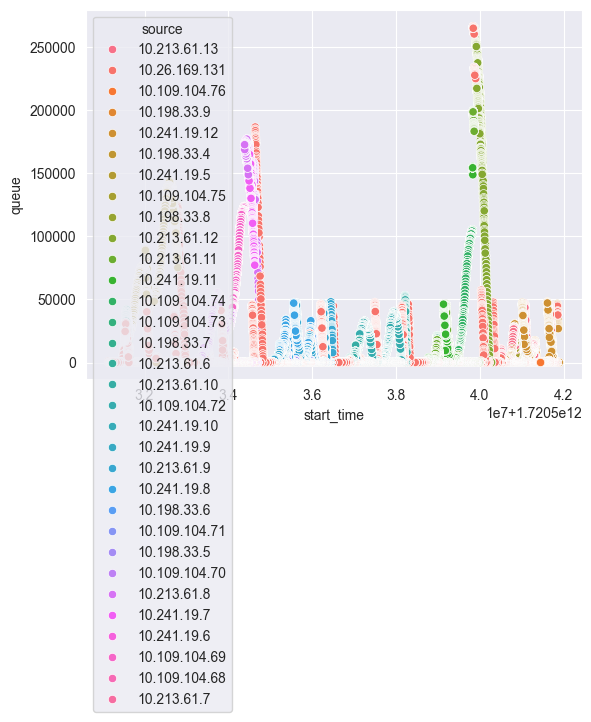

In [5]:
"""
Quick plot to partially visualize the data.
"""
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(y="queue", x="start_time", hue="source", data=df)
# sns.scatterplot(y="queue", x="Unnamed: 0", data=df)
plt.savefig("yolo_queue.png")
# df.plot.scatter(y=df.queue, x=df.index)

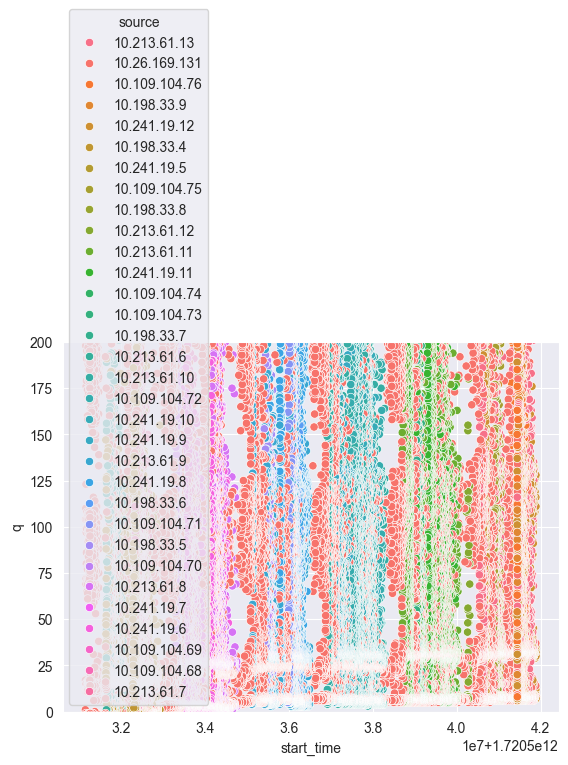

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
df2 = df.copy()
df2["q"] = df2["end_time"] - df2["start_time"]
sns.scatterplot(y="q", x="start_time", hue="source", data=df2)
plt.ylim(0,200)
# sns.scatterplot(y="queue", x="Unnamed: 0", data=df)
plt.savefig("yolo_queue.png")
# df.plot.scatter(y=df.queue, x=df.index)